<a href="https://colab.research.google.com/github/emilsebover/Proyecto_Coder/blob/main/Desaf%C3%ADo_API_BOVER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Necesito poder acceder a datos climáticos de las zonas de producción para el análisis de mi proyecto.

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import json

In [ ]:
import requests

response = requests.get('http://api.weatherstack.com/current', params={
    'access_key': 'a184c0e20b4f87bc2f5682ae1d97908d',
    'query': 'Concepción del Uruguay, Argentina'
    
})

data = response.json()
print(data)


{'request': {'type': 'City', 'query': 'Concepcion Del Uruguay, Argentina', 'language': 'en', 'unit': 'm'}, 'location': {'name': 'Concepcion Del Uruguay', 'country': 'Argentina', 'region': 'Entre Rios', 'lat': '-32.483', 'lon': '-58.228', 'timezone_id': 'America/Argentina/Cordoba', 'localtime': '2023-03-29 20:04', 'localtime_epoch': 1680120240, 'utc_offset': '-3.0'}, 'current': {'observation_time': '11:04 PM', 'temperature': 21, 'weather_code': 353, 'weather_icons': ['https://cdn.worldweatheronline.com/images/wsymbols01_png_64/wsymbol_0025_light_rain_showers_night.png'], 'weather_descriptions': ['Light rain shower'], 'wind_speed': 12, 'wind_degree': 175, 'wind_dir': 'S', 'pressure': 1011, 'precip': 1, 'humidity': 89, 'cloudcover': 83, 'feelslike': 21, 'uv_index': 1, 'visibility': 10, 'is_day': 'no'}}


In [ ]:
!pip install requests


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
info = json.dumps(data)


In [ ]:
df = json.loads(info)

In [ ]:
df

{'request': {'type': 'City',
  'query': 'Concepcion Del Uruguay, Argentina',
  'language': 'en',
  'unit': 'm'},
 'location': {'name': 'Concepcion Del Uruguay',
  'country': 'Argentina',
  'region': 'Entre Rios',
  'lat': '-32.483',
  'lon': '-58.228',
  'timezone_id': 'America/Argentina/Cordoba',
  'localtime': '2023-03-29 20:04',
  'localtime_epoch': 1680120240,
  'utc_offset': '-3.0'},
 'current': {'observation_time': '11:04 PM',
  'temperature': 21,
  'weather_code': 353,
  'weather_icons': ['https://cdn.worldweatheronline.com/images/wsymbols01_png_64/wsymbol_0025_light_rain_showers_night.png'],
  'weather_descriptions': ['Light rain shower'],
  'wind_speed': 12,
  'wind_degree': 175,
  'wind_dir': 'S',
  'pressure': 1011,
  'precip': 1,
  'humidity': 89,
  'cloudcover': 83,
  'feelslike': 21,
  'uv_index': 1,
  'visibility': 10,
  'is_day': 'no'}}

In [ ]:
jsondata=json.loads(info)
df2=pd.DataFrame.from_dict(jsondata)
df2

,request,location,current
type,City,NaN,NaN
query,"Concepcion Del Uruguay, Argentina",NaN,NaN
language,en,NaN,NaN
unit,m,NaN,NaN
name,NaN,Concepcion Del Uruguay,NaN
country,NaN,Argentina,NaN
region,NaN,Entre Rios,NaN
lat,NaN,-32.483,NaN
lon,NaN,-58.228,NaN
timezone_id,NaN,America/Argentina/Cordoba,NaN


La API que encontré solo da el valor instantáneo (del momento en que se ejecuta el código), no sé si es posible configurarlo para que se ejecute una vez al día a una hora determinada y vaya almacenando esa información.

In [ ]:
#Usé directamente meteostat en python para obtener datos históricos de clima
!pip install meteostat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


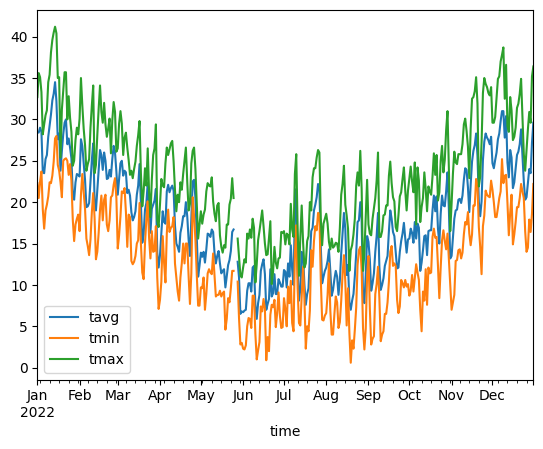

In [ ]:
# Importación de meteostat y otros relacionados
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Definición del período
start = datetime(2022, 1, 1)
end = datetime(2022, 12, 31)

# Definir la ubicación mediante coordenadas
cdu = Point(-32.484474, -58.232199)

# Obtener los datos
clima = Daily(cdu, start, end)
clima = clima.fetch()

# Gráfico de líneas para la temperatura media, mínima y máxima
clima.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [ ]:
clima.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2022-01-01,28.5,22.3,32.7,0.3,NaN,56.0,14.5,NaN,1003.8,NaN
2022-01-02,28.4,20.5,35.6,0.4,NaN,26.0,6.8,NaN,1004.8,NaN
2022-01-03,29.0,22.5,35.1,9.1,NaN,68.0,9.3,NaN,1006.5,NaN
2022-01-04,28.5,23.7,33.3,1.4,NaN,126.0,10.7,NaN,1004.6,NaN
2022-01-05,23.6,19.1,28.2,0.0,NaN,142.0,20.5,NaN,1012.5,NaN


In [ ]:
#creo un subset con los datos que quiero evaluar
datos_cdu=clima[['tavg','tmin','tmax','prcp','wspd']]
datos_cdu.head()

,tavg,tmin,tmax,prcp,wspd
time,,,,,
2022-01-01,28.5,22.3,32.7,0.3,14.5
2022-01-02,28.4,20.5,35.6,0.4,6.8
2022-01-03,29.0,22.5,35.1,9.1,9.3
2022-01-04,28.5,23.7,33.3,1.4,10.7
2022-01-05,23.6,19.1,28.2,0.0,20.5


In [ ]:
# Valor índice para el valor máximo de cada columna
# Valores en cada columna
maxValueIndex = datos_cdu.idxmax()
 
print("Los valores máximos de cada columna se corresponden con las siguientes fechas :")
print(maxValueIndex)

Los valores máximos de cada columna se corresponden con las siguientes fechas :
tavg   2022-01-14
tmin   2022-01-15
tmax   2022-01-14
prcp   2022-02-27
wspd   2022-05-17
dtype: datetime64[ns]


In [ ]:
datos_cdu.max()

tavg    34.5
tmin    28.0
tmax    41.2
prcp    63.6
wspd    26.8
dtype: float64

In [ ]:
# find the index position of maximum
# values in every column
minValueIndex = datos_cdu.idxmin()
 
print("Minimum values of columns are at row index position :")
print(minValueIndex)

Minimum values of columns are at row index position :
tavg   2022-06-11
tmin   2022-08-19
tmax   2022-06-22
prcp   2022-01-05
wspd   2022-05-31
dtype: datetime64[ns]


In [ ]:
datos_cdu.min()

tavg     5.9
tmin     0.6
tmax    10.1
prcp     0.0
wspd     3.5
dtype: float64

In [ ]:
datos_cdu.resample('M').mean()

In [ ]:
datos_cdu_mensuales=datos_cdu.resample('M').mean()


In [ ]:
datos_cdu_mensuales.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [ ]:
ppt=clima[['prcp']]
ppt.head()

In [ ]:
ppt_mensuales=ppt.resample('M').sum()
ppt_mensuales

In [ ]:
ppt_mensuales.plot(kind='bar')

In [2]:

import csv
import codecs
import urllib.request
import urllib.error
import sys

In [1]:
BaseURL = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/'

ApiKey='2ADT4HU2J8JK7RMEAFGAVYDS3'
#UnitGroup sets the units of the output - us or metric
UnitGroup='metric'

#Location for the weather data
Location='-32.468832926893455, -58.27398229401725'

#Optional start and end dates
#If nothing is specified, the forecast is retrieved. 
#If start date only is specified, a single historical or forecast day will be retrieved
#If both start and and end date are specified, a date range will be retrieved
StartDate = '2015-01-01'
EndDate='2023-03-15'

#JSON or CSV 
#JSON format supports daily, hourly, current conditions, weather alerts and events in a single JSON package
#CSV format requires an 'include' parameter below to indicate which table section is required
ContentType="csv"

#include sections
#values include days,hours,current,alerts
Include="days"



In [3]:
#basic query including location
ApiQuery='https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/-32.468832926893455,-58.27398229401725'

#append the start and end date if present
if (len(StartDate)):
    ApiQuery+="2015-01-01"+StartDate
    if (len(EndDate)):
        ApiQuery+="2023-03-15"+EndDate

#Url is completed. Now add query parameters (could be passed as GET or POST)
ApiQuery+="GET"

#append each parameter as necessary
if (len(UnitGroup)):
    ApiQuery+="metric"+UnitGroup

if (len(ContentType)):
    ApiQuery+="csv"+ContentType

if (len(Include)):
    ApiQuery+="include"+Include

ApiQuery+="2ADT4HU2J8JK7RMEAFGAVYDS3"+ApiKey


In [4]:
print(' - Running query URL: ', ApiQuery)
print()

 - Running query URL:  https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/-32.468832926893455,-58.273982294017252015-01-012015-01-012023-03-152023-03-15GETmetricmetriccsvcsvincludedays2ADT4HU2J8JK7RMEAFGAVYDS32ADT4HU2J8JK7RMEAFGAVYDS3



In [5]:
CSVBytes = urllib.request.urlopen(ApiQuery)


HTTPError: ignored